# Translation evaluations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Documents

### Long documents

In [3]:
results = []
data = [
    ("gpt-4o-mini-2024-07-18", 2048, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gpt-4o-mini-2024-07-18/long_docs_translated_evaluated.csv"),
    ("gpt-4o-mini-2024-07-18", 1024, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gpt-4o-mini-2024-07-18/long_docs_segmented_1024_translated_evaluated.csv"),
    ("gpt-4o-mini-2024-07-18", 512, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gpt-4o-mini-2024-07-18/long_docs_segmented_512_translated_evaluated.csv"),
    ("gpt-4o-mini-2024-07-18", 256, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gpt-4o-mini-2024-07-18/long_docs_segmented_256_translated_evaluated.csv"),

    ("gemini-2.0-flash-lite", 2048, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gemini-2.0-flash-lite/long_docs_translated_evaluated.csv"),
    ("gemini-2.0-flash-lite", 1024, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gemini-2.0-flash-lite/long_docs_segmented_1024_translated_evaluated.csv"),
    ("gemini-2.0-flash-lite", 512, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gemini-2.0-flash-lite/long_docs_segmented_512_translated_evaluated.csv"),
    ("gemini-2.0-flash-lite", 256, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/gemini-2.0-flash-lite/long_docs_segmented_256_translated_evaluated.csv"),

    ("google_gemma-2-27b-it", 2048, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/google_gemma-2-27b-it/long_docs_translated_evaluated.csv"),
    ("google_gemma-2-27b-it", 1024, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/google_gemma-2-27b-it/long_docs_segmented_1024_translated_evaluated.csv"),
    ("google_gemma-2-27b-it", 512, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/google_gemma-2-27b-it/long_docs_segmented_512_translated_evaluated.csv"),
    ("google_gemma-2-27b-it", 256, "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/long_documents/google_gemma-2-27b-it/long_docs_segmented_256_translated_evaluated.csv"),
]
for model, limit, file_path in tqdm(data):
    evaluated_df = pd.read_csv(file_path)

    # Step 1: Group by '_id' and compute the average score per group
    grouped_scores = evaluated_df.groupby('_id')['score'].mean()

    # Step 2: Compute the overall average of the grouped scores
    overall_average = grouped_scores.mean()

    results.append({
        'model': model,
        'limit': limit,
        'score': overall_average/5,
        'file_path': file_path
    })


  0%|          | 0/12 [00:00<?, ?it/s]

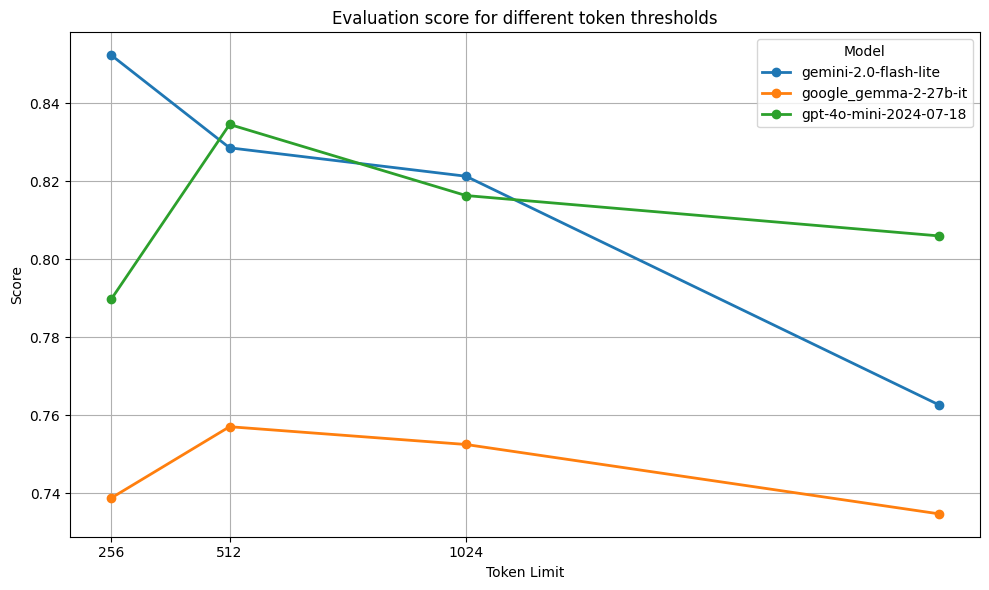

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(results)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot each model separately
for model_name, group in df.groupby("model"):
    plt.plot(group["limit"], group["score"], marker='o', linestyle='-', linewidth=2, label=model_name)

# Labels and title
plt.xlabel("Token Limit")
plt.xticks([1024, 512, 256])
plt.ylabel("Score")
# plt.ylim(0.6, 1)
plt.title("Evaluation score for different token thresholds")
plt.legend(title="Model")

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Queries

In [13]:
results = []
data = [
    ("gpt-4o-mini-2024-07-18", "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/BeIR_msmarco/gpt-4o-mini-2024-07-18/queries_with_ambiguity_translated_evaluated.csv"),
    
    ("gemini-2.0-flash-lite", "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/BeIR_msmarco/gemini-2.0-flash-lite/queries_with_ambiguity_translated_evaluated.csv"),

    ("google_gemma-2-27b-it", "/Users/asaf/Workspace/biu/hebrew_text_retrieval/outputs/translation/BeIR/BeIR_msmarco/google_gemma-2-27b-it/queries_with_ambiguity_translated_evaluated.csv"),
]
for model, file_path in tqdm(data):
    evaluated_df = pd.read_csv(file_path)

    # Step 1: Group by '_id' and compute the average score per group
    grouped_scores = evaluated_df.groupby('_id')['score'].mean()

    # Step 2: Compute the overall average of the grouped scores
    overall_average = grouped_scores.mean()

    results.append({
        'model': model,
        'score': overall_average/5,
        'file_path': file_path
    })


  0%|          | 0/3 [00:00<?, ?it/s]

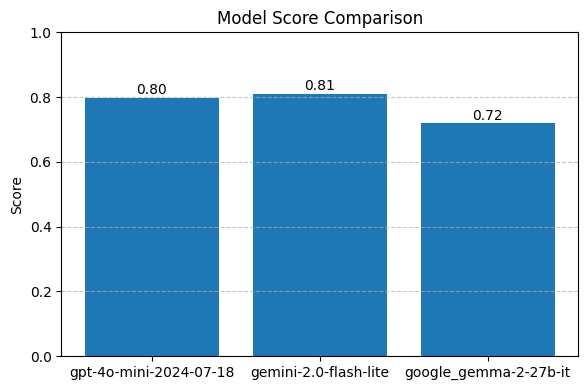

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual df)
df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(df["model"], df["score"])

# Labels and title
plt.ylabel("Score")
plt.title("Model Score Comparison")
plt.ylim(0, 1)  # Optional: normalize scale

# Show values on top of bars
for idx, val in enumerate(df["score"]):
    plt.text(idx, val + 0.01, f"{val:.2f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## ModernBERT Train Compute

In [15]:
file_path = '/Users/asaf/Workspace/biu/hebrew_text_retrieval/data/misc/ModernBERT_train_time_eval - Batch sizes.csv'
df = pd.read_csv(file_path)
df.head()

,Dataset name,Dataset size,Tokenizer,Train,Max sequence length,Vocab size (K),Batch size,Device batch size,Tokens / second,GPUs,Train time in seconds,Train time in hours,GPU Memory (GB),GPU Memeory Util,GPU Util %
0,C4 (English),"165,000,000,000",bert-base-uncased,train_small,8192.0,32.0,64.0,16.0,"4,337,357",2.0,"76,083.20",21.13,28,34.15%,90.00%
1,C4 (English),"165,000,000,000",bert-base-uncased,train,8192.0,32.0,128.0,16.0,"4,526,962",2.0,"72,896.57",20.25,25,30.49%,95.00%
2,C4 (English),"165,000,000,000",bert-base-uncased,train,8192.0,32.0,128.0,32.0,"5,379,388",2.0,"61,345.27",17.04,35,42.68%,94.00%
3,C4 (English),"165,000,000,000",bert-base-uncased,train,8192.0,32.0,256.0,64.0,"5,996,190",2.0,"55,034.95",15.29,58,70.73%,99.00%
4,C4 (English),"165,000,000,000",bert-base-uncased,train_small,8192.0,32.0,512.0,64.0,"6,185,994",2.0,"53,346.32",14.82,57,69.51%,99.00%


In [22]:
df.columns

Index(['Dataset name', 'Dataset size', 'Tokenizer', 'Train',
       'Max sequence length', 'Vocab size (K)', 'Batch size',
       'Device batch size', 'Tokens / second', 'GPUs', 'Train time in seconds',
       'Train time in hours', 'GPU Memory (GB)', 'GPU Memeory Util',
       'GPU Util %'],
      dtype='object')

In [43]:
df_clean = df.copy()
df_clean['GPU Memeory Util'] = (
    df_clean['GPU Memeory Util']
    .astype(str)
    .str.strip('%')
)

for col in ['GPU Memeory Util', 'Device batch size', 'Vocab size (K)']:
    df_clean = df_clean[df_clean[col].astype(str).str.match(r'^-?\d+(\.\d+)?$')]

# Step 3: Convert columns to float
df_clean['GPU Memeory Util'] = df_clean['GPU Memeory Util'].astype(float)
df_clean['Device batch size'] = df_clean['Device batch size'].astype(int)
df_clean['Vocab size (K)'] = df_clean['Vocab size (K)'].astype(int)
cols_to_check = ['Device batch size', 'GPU Memeory Util', 'Vocab size (K)']
# df_clean[cols_to_check] = df_clean[cols_to_check].apply(pd.to_numeric, errors='coerce')
# df_clean = df_clean.dropna(subset=cols_to_check)
df_clean[cols_to_check].head(30)

,Device batch size,GPU Memeory Util,Vocab size (K)
0,16,34.15,32
1,16,30.49,32
2,32,42.68,32
3,64,70.73,32
4,64,69.51,32
6,64,82.93,32
8,64,79.27,32
9,64,84.15,64
10,64,91.46,64
12,64,97.56,96


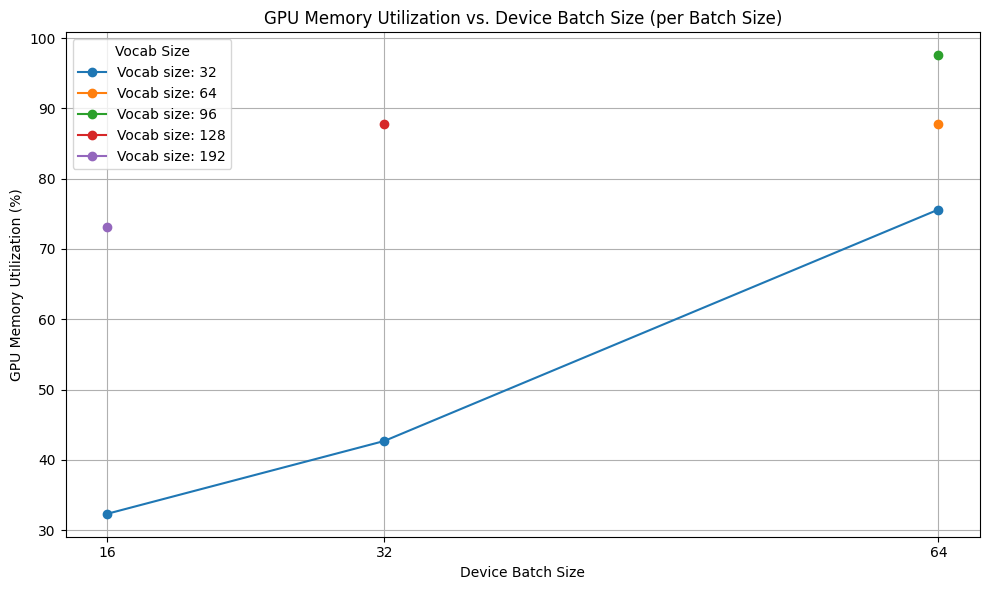

In [45]:
# Average GPU Util for same (device batch size, batch size) pairs
df_avg = df_clean.groupby(['Device batch size', 'Vocab size (K)'], as_index=False)['GPU Memeory Util'].mean()

# Plot using matplotlib with hue based on 'Batch size'
plt.figure(figsize=(10, 6))

batch_sizes = sorted(df_avg['Vocab size (K)'].unique())
for batch_size in batch_sizes:
    subset = df_avg[df_avg['Vocab size (K)'] == batch_size]
    plt.plot(subset['Device batch size'],
             subset['GPU Memeory Util'],
             marker='o',
             label=f'Vocab size: {int(batch_size)}')

plt.xlabel('Device Batch Size')
xticks = sorted(df_avg['Device batch size'].unique())
plt.xticks(xticks)
plt.ylabel('GPU Memory Utilization (%)')
plt.title('GPU Memory Utilization vs. Device Batch Size (per Batch Size)')
plt.legend(title='Vocab Size')
plt.grid(True)
plt.tight_layout()
plt.show()